<a href="https://colab.research.google.com/github/Da-Yneb/Vgg-16/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipynb

In [2]:

import torch
import urllib
from PIL import Image
from torchvision import transforms
import requests
import tarfile
from matplotlib import pyplot as plt
import os
import numpy as np
import xml.etree.ElementTree as ET


In [3]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:09<00:00, 58.2MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# **Load Dog DataSet**

In [4]:
!rm -rf DatasetStore

In [5]:
dataset_path = "DatasetStore"

# Download and extract dataset
if not os.path.exists(dataset_path):
  os.mkdir(dataset_path)
  packet_url = "http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar"
  packet_file = os.path.basename(packet_url)
  packet_file = os.path.join(dataset_path, packet_file)
  with requests.get(packet_url, stream=True) as r:
      r.raise_for_status()
      with open(packet_file, 'wb') as f:
          for chunk in r.iter_content(chunk_size=8192):
              f.write(chunk)

  with tarfile.open(packet_file) as tfile:
    tfile.extractall(dataset_path)

  packet_url = "http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar"
  packet_file = os.path.basename(packet_url)
  packet_file = os.path.join(dataset_path, packet_file)
  with requests.get(packet_url, stream=True) as r:
      r.raise_for_status()
      with open(packet_file, 'wb') as f:
          for chunk in r.iter_content(chunk_size=8192):
              f.write(chunk)

  with tarfile.open(packet_file) as tfile:
    tfile.extractall(dataset_path)

**List all breeds**


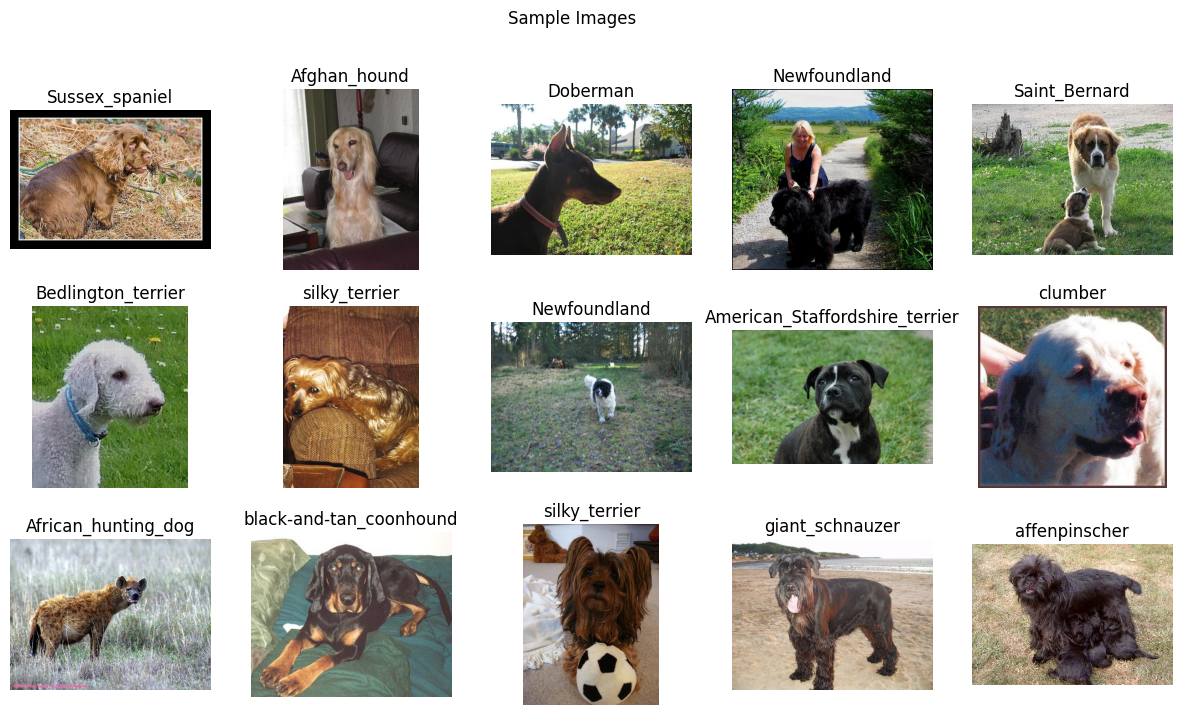

In [6]:
breed_list = os.listdir('DatasetStore/Annotation/')

fig = plt.figure(figsize=(15,8))
for i in range(15):
    axs = fig.add_subplot(3,5,i+1)
    breed = np.random.choice(breed_list)
    dog = np.random.choice(os.listdir('DatasetStore/Annotation/' + breed))
    img = Image.open('DatasetStore/Images/' + breed + '/' + dog + '.jpg')
    tree = ET.parse('DatasetStore/Annotation/' + breed + '/' + dog)
    root = tree.getroot()
    object_1 = root.findall('object')[0]
    name = object_1.find('name').text
    axs.set_title(name)
    plt.imshow(img)
    plt.axis('off')

plt.suptitle("Sample Images")
plt.show()

In [7]:
breed_list = os.listdir('DatasetStore/Annotation/')
breed_list.sort()
for i,breed in enumerate(breed_list):
  breed_list[i] = breed[10:]

# Create label index for easy lookup
label2index = dict((name, index) for index, name in enumerate(breed_list))
index2label = dict((index, name) for index, name in enumerate(breed_list))
print(breed_list)
print(label2index)
print(index2label)

['Chihuahua', 'Japanese_spaniel', 'Maltese_dog', 'Pekinese', 'Shih-Tzu', 'Blenheim_spaniel', 'papillon', 'toy_terrier', 'Rhodesian_ridgeback', 'Afghan_hound', 'basset', 'beagle', 'bloodhound', 'bluetick', 'black-and-tan_coonhound', 'Walker_hound', 'English_foxhound', 'redbone', 'borzoi', 'Irish_wolfhound', 'Italian_greyhound', 'whippet', 'Ibizan_hound', 'Norwegian_elkhound', 'otterhound', 'Saluki', 'Scottish_deerhound', 'Weimaraner', 'Staffordshire_bullterrier', 'American_Staffordshire_terrier', 'Bedlington_terrier', 'Border_terrier', 'Kerry_blue_terrier', 'Irish_terrier', 'Norfolk_terrier', 'Norwich_terrier', 'Yorkshire_terrier', 'wire-haired_fox_terrier', 'Lakeland_terrier', 'Sealyham_terrier', 'Airedale', 'cairn', 'Australian_terrier', 'Dandie_Dinmont', 'Boston_bull', 'miniature_schnauzer', 'giant_schnauzer', 'standard_schnauzer', 'Scotch_terrier', 'Tibetan_terrier', 'silky_terrier', 'soft-coated_wheaten_terrier', 'West_Highland_white_terrier', 'Lhasa', 'flat-coated_retriever', 'cur

In [8]:
breed_list = os.listdir('DatasetStore/Annotation/')
breed_list.sort()

label2index = dict((name, index) for index, name in enumerate(breed_list))
index2label = dict((index, name) for index, name in enumerate(breed_list))
print(breed_list)
print(label2index)



images = []
annotations =[]
for breed in breed_list:
  image_files = os.listdir('DatasetStore/Images/' + breed)
  image_files.sort()
  images.extend([os.path.join('DatasetStore/Images/',breed,f) for f in image_files])
  annotations.extend([os.path.join('DatasetStore/Annotation/',breed,f.replace(".jpg","")) for f in image_files])

for idx, ann in enumerate(annotations):
    annotations[idx] = ann.split("/")[2]

print(images[:5])
print(annotations[:5])

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

In [9]:
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [10]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2024-03-09 13:36:39--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2024-03-09 13:36:39 (102 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [11]:
def getRandomPic():
  breed_list = os.listdir('DatasetStore/Annotation/')
  breed = np.random.choice(breed_list)
  dog = np.random.choice(os.listdir('DatasetStore/Annotation/' + breed))
  img = Image.open('DatasetStore/Images/' + breed + '/' + dog + '.jpg')
  tree = ET.parse('DatasetStore/Annotation/' + breed + '/' + dog)
  root = tree.getroot()
  object_1 = root.findall('object')[0]
  name = object_1.find('name').text
  img = Image.open('DatasetStore/Images/' + breed + '/' + dog + '.jpg')
  return img #, name

In [28]:
def findDogBreed(img):
  if type(img) == str:
    img = Image.open(img)

  plt.imshow(img)
  plt.axis('off')
  # print("Dog Breed is: ", name)

  input_image = img #Image.open(filename)
  preprocess = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])
  input_tensor = preprocess(input_image)
  input_batch = input_tensor.unsqueeze(0)

  if torch.cuda.is_available():
      input_batch = input_batch.to('cuda')
      model.to('cuda')

  with torch.no_grad():
      output = model(input_batch)

  # print(output[0])

  probabilities = torch.nn.functional.softmax(output[0], dim=0)
  # print(probabilities)

  # Read the categories
  with open("imagenet_classes.txt", "r") as f:
      categories = [s.strip() for s in f.readlines()]
  # Show top categories per image
  top5_prob, top5_catid = torch.topk(probabilities, 5)
  answer = {}
  for i in range(top5_prob.size(0)):
      # print(categories[top5_catid[i]], top5_prob[i].item())
      answer[categories[top5_catid[i]]] = top5_prob[i].item()


  return img, answer

In [29]:
def findRandomDog():
  img = getRandomPic()
  img, answer = findDogBreed(img) #, name

  # for key, value in answer.items():
    # print(key, value)
  return img, answer

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=222x200>,
 {'bull mastiff': 0.3274180293083191,
  'American Staffordshire terrier': 0.2852916121482849,
  'Chesapeake Bay retriever': 0.1657303273677826,
  'vizsla': 0.06768029183149338,
  'Staffordshire bullterrier': 0.053906045854091644})

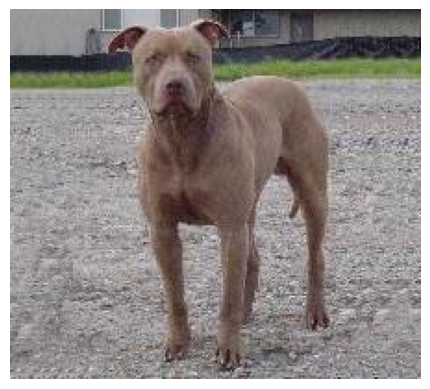

In [30]:
findRandomDog()


(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1285x964>,
 {'red fox': 0.9153522253036499,
  'grey fox': 0.04287378117442131,
  'kit fox': 0.03737706318497658,
  'dhole': 0.0020401666406542063,
  'red wolf': 0.0012039130087941885})

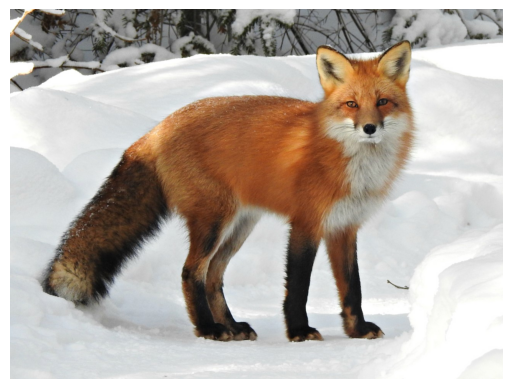

In [31]:
findDogBreed("/content/fox.jpg")

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=628x488>,
 {'French bulldog': 0.8309138417243958,
  'Boston bull': 0.16117526590824127,
  'toy terrier': 0.005902342032641172,
  'Chihuahua': 0.0008410495356656611,
  'Brabancon griffon': 0.0003221676452085376})

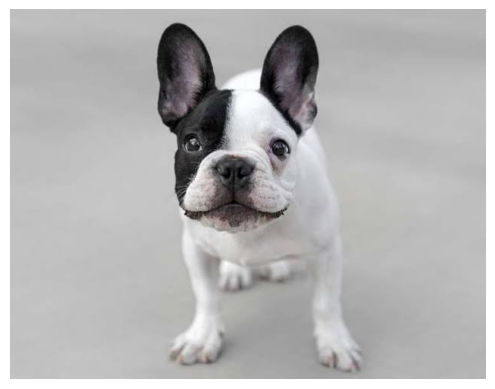

In [32]:
findDogBreed("/content/french_bulldog.jpg")

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3440x2664>,
 {'timber wolf': 0.6992533802986145,
  'red wolf': 0.21260350942611694,
  'coyote': 0.06977196037769318,
  'white wolf': 0.011410986073315144,
  'dingo': 0.006542350631207228})

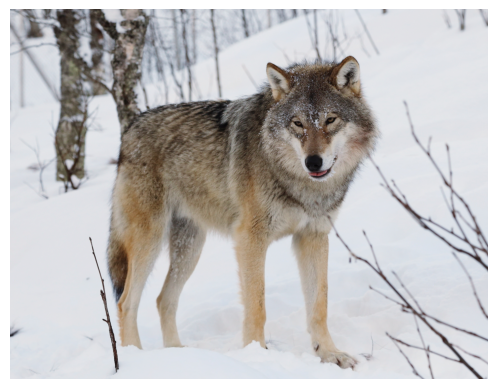

In [33]:
findDogBreed("/content/wolf.jpg")

# **Streamlit code**

In [88]:
%%writefile app.py
import torch
import urllib
from PIL import Image
from io import BytesIO
from torchvision import transforms
import requests
import tarfile
from matplotlib import pyplot as plt
import os
import numpy as np
import xml.etree.ElementTree as ET
import streamlit as st
from tempfile import NamedTemporaryFile
import cv2



model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)
model.eval()

def getRandomPic():
  breed_list = os.listdir('DatasetStore/Annotation/')
  breed = np.random.choice(breed_list)
  dog = np.random.choice(os.listdir('DatasetStore/Annotation/' + breed))
  img = Image.open('DatasetStore/Images/' + breed + '/' + dog + '.jpg')
  tree = ET.parse('DatasetStore/Annotation/' + breed + '/' + dog)
  root = tree.getroot()
  object_1 = root.findall('object')[0]
  name = object_1.find('name').text
  #img = Image.open('DatasetStore/Images/' + breed + '/' + dog + '.jpg')
  img = 'DatasetStore/Images/' + breed + '/' + dog + '.jpg'
  return img #, name


def findDogBreed(img):
  if type(img) == str:
    img = Image.open(img)
  else:
    img = Image.open(BytesIO(img))


  plt.imshow(img)
  plt.axis('off')
  # print("Dog Breed is: ", name)

  input_image = img #Image.open(filename)
  preprocess = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])
  input_tensor = preprocess(input_image)
  input_batch = input_tensor.unsqueeze(0)

  if torch.cuda.is_available():
      input_batch = input_batch.to('cuda')
      model.to('cuda')

  with torch.no_grad():
      output = model(input_batch)

  # print(output[0])

  probabilities = torch.nn.functional.softmax(output[0], dim=0)
  # print(probabilities)

  # Read the categories
  with open("imagenet_classes.txt", "r") as f:
      categories = [s.strip() for s in f.readlines()]
  # Show top categories per image
  top5_prob, top5_catid = torch.topk(probabilities, 5)
  answer = {}
  for i in range(top5_prob.size(0)):
      print(categories[top5_catid[i]], top5_prob[i].item())
      answer[categories[top5_catid[i]]] = top5_prob[i].item()

  return img, answer


def findRandomDog():
  img = getRandomPic()
  img, answer = findDogBreed(img) #, name
  for key, value in answer.items():
    print(key, value)
  return img, answer

def convert_image(img):
    buf = BytesIO()
    img.save(buf, format="PNG")
    byte_im = buf.getvalue()
    return byte_im



st.title('Dog Breed Finder:')
st.write('Upload a dog photo or choos a random photo!')

result = st.button("Random Dog")
if result:
  img_ran, answer_ran = findRandomDog()
  st.write("# Your image:")
  st.image(img_ran)
  for key, value in answer_ran.items():
    st.write(key,": ", round(value, 2)*100,"%")

buffer = st.file_uploader("Upload a picture", type="jpg")
if buffer is not None:
    st.write("# Your image:")

    img_uploaded = buffer.getvalue()


    img, answer = findDogBreed(img_uploaded)
    st.image(img)
    for key, value in answer.items():
      st.write(key,": ", value*100,"%")

Overwriting app.py


In [ ]:
!pip install streamlit


In [90]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.41.96.219
npx: installed 22 in 2.55s
your url is: https://new-drinks-crash.loca.lt
